# **4 Confidence Interval- Coding Exercises.**


 Exercise 1- Confidence Interval for Mean (Single Sample):
 • Scenario: A company tracks the delivery time (in days) for their products. A random sample of 50
 deliveries had an average time of 4.2 days with a sample standard deviation of 1.1 days.– Task:
 ∗ Compute 95% confidence interval for the population mean delivery time using the t- dis
tribution

In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime

In [21]:
# Exercise 1 – CI for a Mean (t CI)
n1 = 50
sample_mean1 = 4.2
sample_std1 = 1.1
confidence1 = 0.95

In [22]:
# Standard Error
se1 = sample_std1 / np.sqrt(n1)

# Degrees of freedom and t critical
df1 = n1 - 1
alpha1 = 1 - confidence1
t_crit1 = stats.t.ppf(1 - alpha1/2, df1)

# Margin of Error and CI
me1 = t_crit1 * se1
ci1 = (sample_mean1 - me1, sample_mean1 + me1)

In [23]:
print("Exercise 1 — 95% CI for Population Mean (t-based)")
print(f"Given: n={n1}, sample mean={sample_mean1}, sample SD={sample_std1}, confidence={confidence1:.0%}")
print(f"Standard Error (SE) = s/sqrt(n) = {se1:.6f}")
print(f"t critical (df={df1}) = {t_crit1:.6f}")
print(f"Margin of Error (ME) = t_crit * SE = {me1:.6f}")
print(f"95% Confidence Interval = ({ci1[0]:.6f}, {ci1[1]:.6f})")


Exercise 1 — 95% CI for Population Mean (t-based)
Given: n=50, sample mean=4.2, sample SD=1.1, confidence=95%
Standard Error (SE) = s/sqrt(n) = 0.155563
t critical (df=49) = 2.009575
Margin of Error (ME) = t_crit * SE = 0.312617
95% Confidence Interval = (3.887383, 4.512617)


 We are 95% confident that the true mean delivery time lies within the interval above.
      If we repeatedly drew new samples of size 50 and built a t-based CI each time, about 95% of those intervals
      would capture the true population mean.

# Exercise 2- Confidence Interval for Proportion:

 • Scenario: Ane-commerce platform wants to estimate the proportion of customers who prefer express
 delivery. Out of 400 surveyed users, 128 preferred express delivery.
 • Tasks:– Compute a 90% confidence interval for the true proportion of customers who prefer express
 delivery

In [24]:
n2 = 400
x2 = 128
confidence2 = 0.90

In [25]:
phat2 = x2 / n2
se2 = np.sqrt(phat2 * (1 - phat2) / n2)
alpha2 = 1 - confidence2
z_crit2 = stats.norm.ppf(1 - alpha2/2)
me2 = z_crit2 * se2
ci2 = (phat2 - me2, phat2 + me2)

# Bounded the CI to [0,1] to be safe
ci2 = (max(0.0, ci2[0]), min(1.0, ci2[1]))

In [26]:
print("Exercise 2  90% CI for Proportion (z-based)")
print(f"Given: n={n2}, successes={x2}, confidence={confidence2:.0%}")
print(f"Sample proportion (p̂) = {phat2:.6f}")
print(f"Standard Error (SE) = sqrt(p̂(1-p̂)/n) = {se2:.6f}")
print(f"z critical = {z_crit2:.6f}")
print(f"Margin of Error (ME) = z_crit * SE = {me2:.6f}")
print(f"90% Confidence Interval = ({ci2[0]:.6f}, {ci2[1]:.6f})")

Exercise 2  90% CI for Proportion (z-based)
Given: n=400, successes=128, confidence=90%
Sample proportion (p̂) = 0.320000
Standard Error (SE) = sqrt(p̂(1-p̂)/n) = 0.023324
z critical = 1.644854
Margin of Error (ME) = z_crit * SE = 0.038364
90% Confidence Interval = (0.281636, 0.358364)


 We are 90% confident that the true proportion of customers who prefer express delivery
      falls within this interval. In repeated sampling, about 90% of such intervals would contain the true proportion

# Exercise 3- Compare Two Means (Independent Samples):

 • Scenario: A company wants to compare weekly sales (in $) from two different regions.– Region A: n = 40, mean = 5200, SD = 610.– Region B: n = 35, mean = 4900, SD = 580.
 • Tasks:– Compute the 95% confidence interval for the difference in population means

In [27]:
nA, meanA, sdA = 40, 5200, 610
nB, meanB, sdB = 35, 4900, 580
confidence3 = 0.95

In [28]:
# Standard error of difference
se3 = np.sqrt(sdA**2 / nA + sdB**2 / nB)

# Welch-Satterthwaite degrees of freedom
num = (sdA**2 / nA + sdB**2 / nB) ** 2
den = ((sdA**2 / nA) ** 2) / (nA - 1) + ((sdB**2 / nB) ** 2) / (nB - 1)
df3 = num / den

alpha3 = 1 - confidence3
t_crit3 = stats.t.ppf(1 - alpha3/2, df3)

diff_means = meanA - meanB
me3 = t_crit3 * se3
ci3 = (diff_means - me3, diff_means + me3)

In [29]:
print("Exercise 3 — 95% CI for Difference of Means (Region A − Region B) using Welch's t")
print(f"Given: Region A (n={nA}, mean={meanA}, SD={sdA}), Region B (n={nB}, mean={meanB}, SD={sdB})")
print(f"Standard Error of difference = {se3:.6f}")
print(f"Welch-Satterthwaite df ≈ {df3:.6f}")
print(f"t critical = {t_crit3:.6f}")
print(f"Difference in sample means = {diff_means:.6f}")
print(f"Margin of Error (ME) = t_crit * SE = {me3:.6f}")
print(f"95% Confidence Interval for (μA − μB) = ({ci3[0]:.6f}, {ci3[1]:.6f})")
contains_zero = ci3[0] <= 0 <= ci3[1]

Exercise 3 — 95% CI for Difference of Means (Region A − Region B) using Welch's t
Given: Region A (n=40, mean=5200, SD=610), Region B (n=35, mean=4900, SD=580)
Standard Error of difference = 137.527919
Welch-Satterthwaite df ≈ 72.476038
t critical = 1.993240
Difference in sample means = 300.000000
Margin of Error (ME) = t_crit * SE = 274.126135
95% Confidence Interval for (μA − μB) = (25.873865, 574.126135)


This interval estimates how much higher (or lower) Region A's true mean sales are than Region B's.


Does the interval include 0? No. Since it excludes 0, the difference appears statistically significant at 95% confidence

# Exercise 4- Visualizing Confidence Intervals:

 • Scenario: You collected sample means from a simulation study of customer ratings (1 to 5 stars).
 You want to visualize how the confidence interval captures the true mean.
 • Tasks:– Simulate 100 samples of size 30 from a population with mean = 3.6 and std = 0.8– For each sample, compute the 95% confidence interval– Plot the intervals and highlight how many contain the true mean (3.6)

In [30]:
np.random.seed(7)

true_mean = 3.6
true_std = 0.8
num_samples = 100
sample_size = 30
confidence4 = 0.95
alpha4 = 1 - confidence4

In [31]:
lower_bounds = []
upper_bounds = []
contains_true = []

for _ in range(num_samples):
    sample = np.random.normal(loc=true_mean, scale=true_std, size=sample_size)
    xbar = np.mean(sample)
    s = np.std(sample, ddof=1)
    se = s / np.sqrt(sample_size)
    t_crit = stats.t.ppf(1 - alpha4/2, sample_size - 1)
    me = t_crit * se
    lower = xbar - me
    upper = xbar + me
    lower_bounds.append(lower)
    upper_bounds.append(upper)
    contains_true.append(lower <= true_mean <= upper)

coverage = np.mean(contains_true)

In [32]:
print("Exercise 4 — Simulation of 95% CIs for many samples")
print(f"Population: Normal(mean={true_mean}, std={true_std}); samples: {num_samples} of size {sample_size}")
print(f"Coverage (proportion of intervals containing true mean): {coverage:.3f}")

Exercise 4 — Simulation of 95% CIs for many samples
Population: Normal(mean=3.6, std=0.8); samples: 100 of size 30
Coverage (proportion of intervals containing true mean): 0.970


For a 95% CI procedure, we expect around 0.95 of intervals to contain the true mean; with 100 samples, the realized coverage will typically be near 0.95

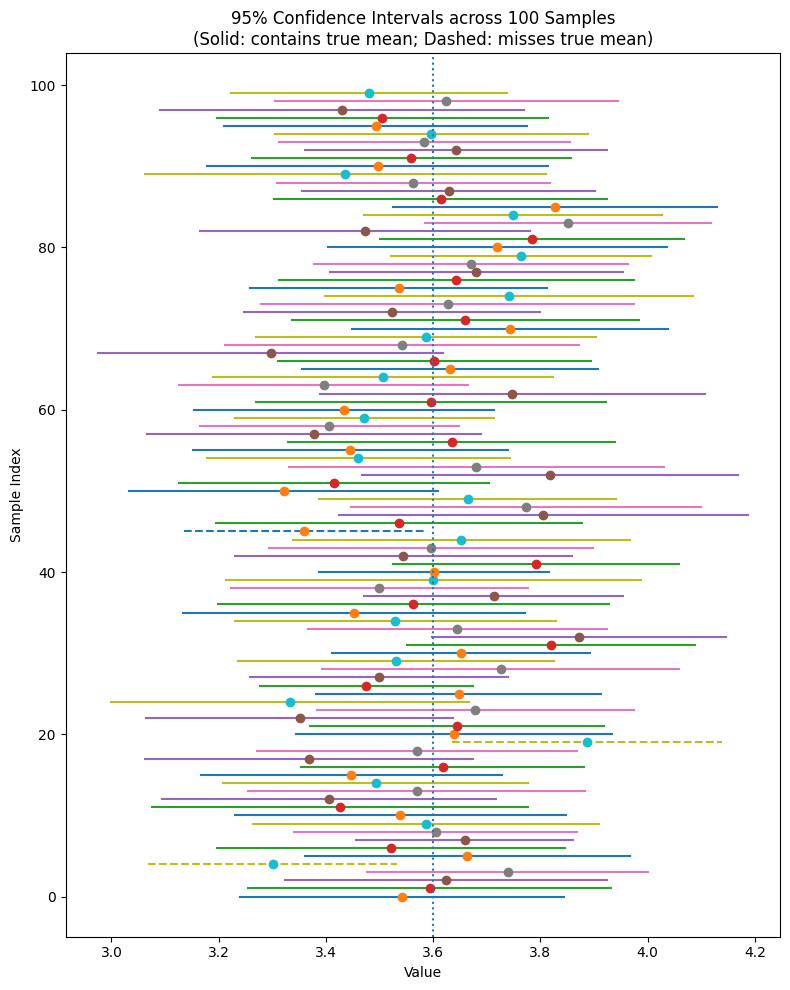

In [33]:
fig = plt.figure(figsize=(8, 10))
y_positions = np.arange(num_samples)

for i, (lo, hi, ok) in enumerate(zip(lower_bounds, upper_bounds, contains_true)):
    style = '-' if ok else '--'
    plt.plot([lo, hi], [i, i], linestyle=style)
    plt.plot([(lo + hi)/2], [i], marker='o')

plt.axvline(true_mean, linestyle=':')
plt.xlabel("Value")
plt.ylabel("Sample Index")
plt.title("95% Confidence Intervals across 100 Samples\n(Solid: contains true mean; Dashed: misses true mean)")
plt.tight_layout()
plt.show()